## The cell below will get the data file, you only need to run it once 

(you do not need to do this if you have done it in the Interfacing_R notebook)

In [1]:
!rm sequence.index 2>/dev/null
!wget -nd ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/historical_data/former_toplevel/sequence.index -O sequence.index

--2016-02-05 15:50:22--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/historical_data/former_toplevel/sequence.index
           => 'sequence.index'
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.192.8
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.192.8|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/historical_data/former_toplevel ... done.
==> SIZE sequence.index ... 67069489
==> PASV ... done.    ==> RETR sequence.index ... done.
Length: 67069489 (64M) (unauthoritative)

sequence.index      100%[=====================>]  63.96M   419KB/s   in 2m 27s 

2016-02-05 15:52:54 (445 KB/s) - 'sequence.index' saved [67069489]



In [1]:
import rpy2.robjects as robjects
import rpy2.robjects.lib.ggplot2 as ggplot2

%load_ext rpy2.ipython

/home/tiago_antao/anaconda3/lib/python3.6/site-packages/rpy2/robjects/lib/ggplot2.py:67: UserWarning: This was designed againt ggplot2 version 2.2.1 but you have 3.0.0
  warnings.warn('This was designed againt ggplot2 version %s but you have %s' % (TARGET_VERSION, ggplot2.__version__))


In [31]:
%%R
seq.data <- read.delim('sequence.index', header=TRUE, stringsAsFactors=FALSE)
seq.data$READ_COUNT <- as.integer(seq.data$READ_COUNT)
seq.data$BASE_COUNT <- as.integer(seq.data$BASE_COUNT)

In [32]:
seq_data = %R seq.data
print(type(seq_data))  #pandas dataframe!

/home/tiago_antao/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


<class 'pandas.core.frame.DataFrame'>


In [33]:
my_col = list(seq_data.columns).index("CENTER_NAME")
seq_data['CENTER_NAME'] = seq_data['CENTER_NAME'].apply(lambda x: x.upper())

False


In [37]:
%R -i seq_data
%R print(colnames(seq_data))

/home/tiago_antao/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


 [1] "FASTQ_FILE"          "MD5"                 "RUN_ID"             
 [4] "STUDY_ID"            "STUDY_NAME"          "CENTER_NAME"        
 [7] "SUBMISSION_ID"       "SUBMISSION_DATE"     "SAMPLE_ID"          
[10] "SAMPLE_NAME"         "POPULATION"          "EXPERIMENT_ID"      
[13] "INSTRUMENT_PLATFORM" "INSTRUMENT_MODEL"    "LIBRARY_NAME"       
[16] "RUN_NAME"            "RUN_BLOCK_NAME"      "INSERT_SIZE"        
[19] "LIBRARY_LAYOUT"      "PAIRED_FASTQ"        "WITHDRAWN"          
[22] "WITHDRAWN_DATE"      "COMMENT"             "READ_COUNT"         
[25] "BASE_COUNT"          "ANALYSIS_GROUP"     


In [38]:
%%R
seq_data <- seq_data[seq_data$WITHDRAWN==0, ]
seq_data$POPULATION <- as.factor(seq_data$POPULATION)

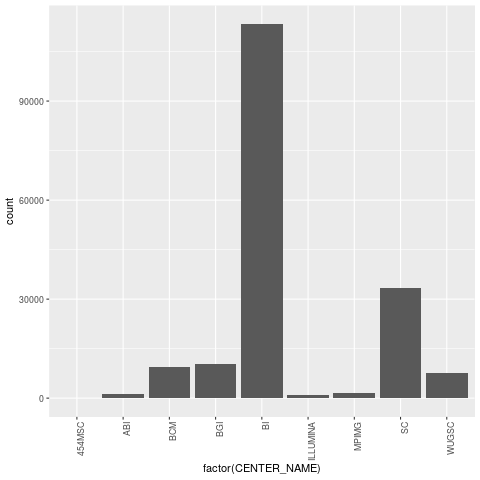

In [39]:
%%R
bar <- ggplot(seq_data) +  aes(factor(CENTER_NAME)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))
print(bar)

In [40]:
%%R
seq_data$POPULATION <- as.factor(seq_data$POPULATION)
yri_ceu <- seq_data[seq_data$POPULATION %in% c("YRI", "CEU") & seq_data$BASE_COUNT < 2E9 & seq_data$READ_COUNT < 3E7, ]

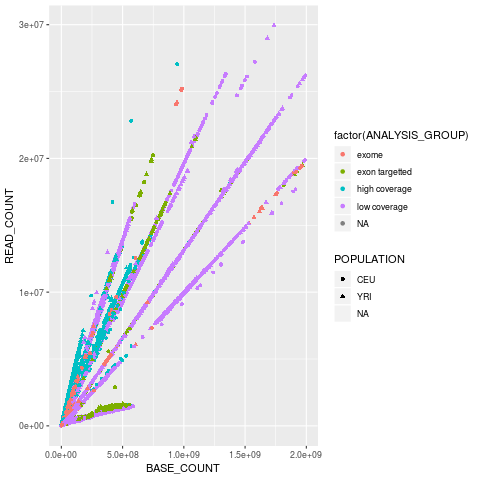

In [41]:
%%R
scatter <- ggplot(yri_ceu, aes(x=BASE_COUNT, y=READ_COUNT, col=factor(ANALYSIS_GROUP), shape=POPULATION)) + geom_point()
print(scatter)

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]


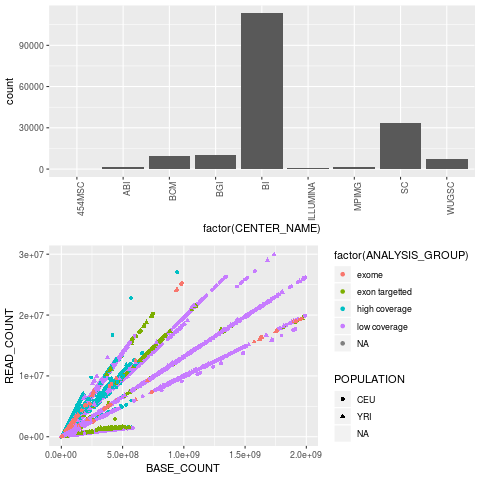

In [43]:
%%R
library(gridExtra)
library(grid)
g <- grid.arrange(bar, scatter, ncol=1)
g

In [44]:
%%R
png('fig.png')
g
dev.off()

png 
  2 
